**Importing the utility libraries**

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading the Titanic CSV files and creating the dataframes**

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
ds=pd.read_csv('test.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking the TYPES of data in out dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Checking the NaN values in our dataframe**

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Checking the shape of model**

In [ ]:
df.shape

(891, 12)

**Dropping the Name and Cabin Columns**

In [ ]:
df=df.drop(['Name','Cabin'],axis=1)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

**Describing the *Age* Column of Dataframe**

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df[df['Age']==0.42]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,male,0.42,0,1,2625,8.5167,C


# Data Viz

Counter Plots

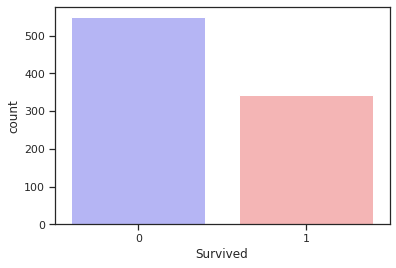

In [ ]:
sns.set(style="ticks")
f = sns.countplot(x="Survived", data=df, palette="bwr")
plt.show()

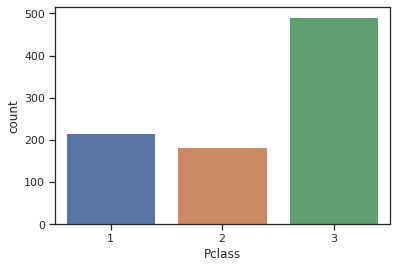

In [ ]:
sns.countplot(x='Pclass',data = df)

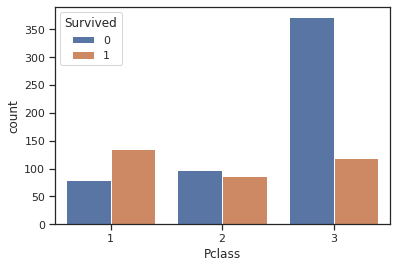

In [ ]:
sns.countplot(x='Pclass', hue='Survived',data=df)


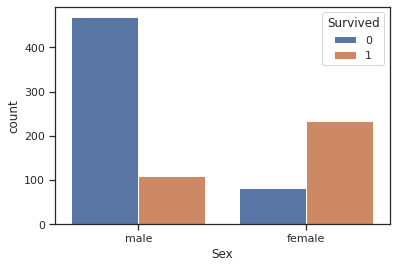

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=df)

Violin Plot

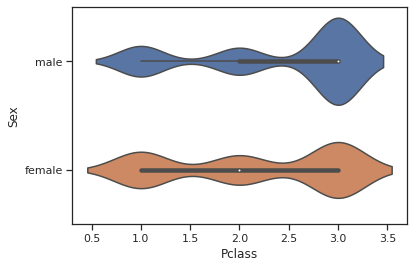

In [ ]:
sns.violinplot("Pclass",'Sex',data=df)

Joint Plot

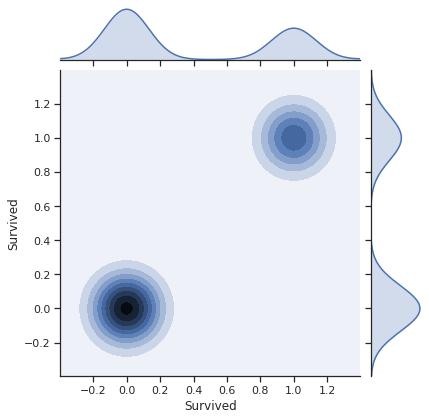

In [ ]:
sns.jointplot(x="Survived",y='Survived',data=df, kind="kde")

Bar Plot

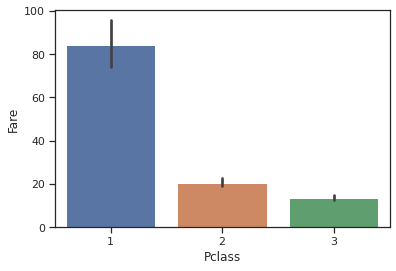

In [ ]:
sns.barplot(x='Pclass',y='Fare',data=df)

Factor Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



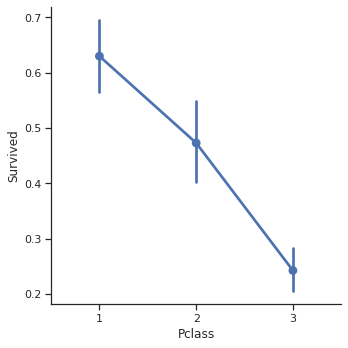

In [ ]:
sns.factorplot('Pclass','Survived',data=df)

***HEATMAP***


Sex_female    0.543351
Sex_male      0.543351
Survived      1.000000
Name: Survived, dtype: float64

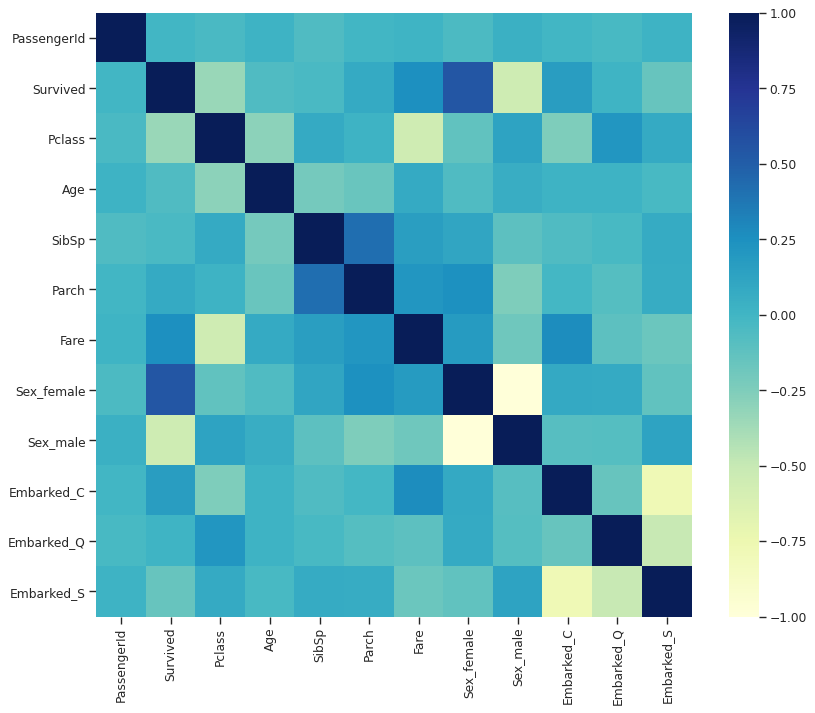

In [ ]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr= df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap="YlGnBu")

# Selecting only correlated features
corr_y = abs(corr['Survived'])
highest_corr = corr_y[corr_y >0.4]
highest_corr.sort_values(ascending=True)


**Pair Plot**

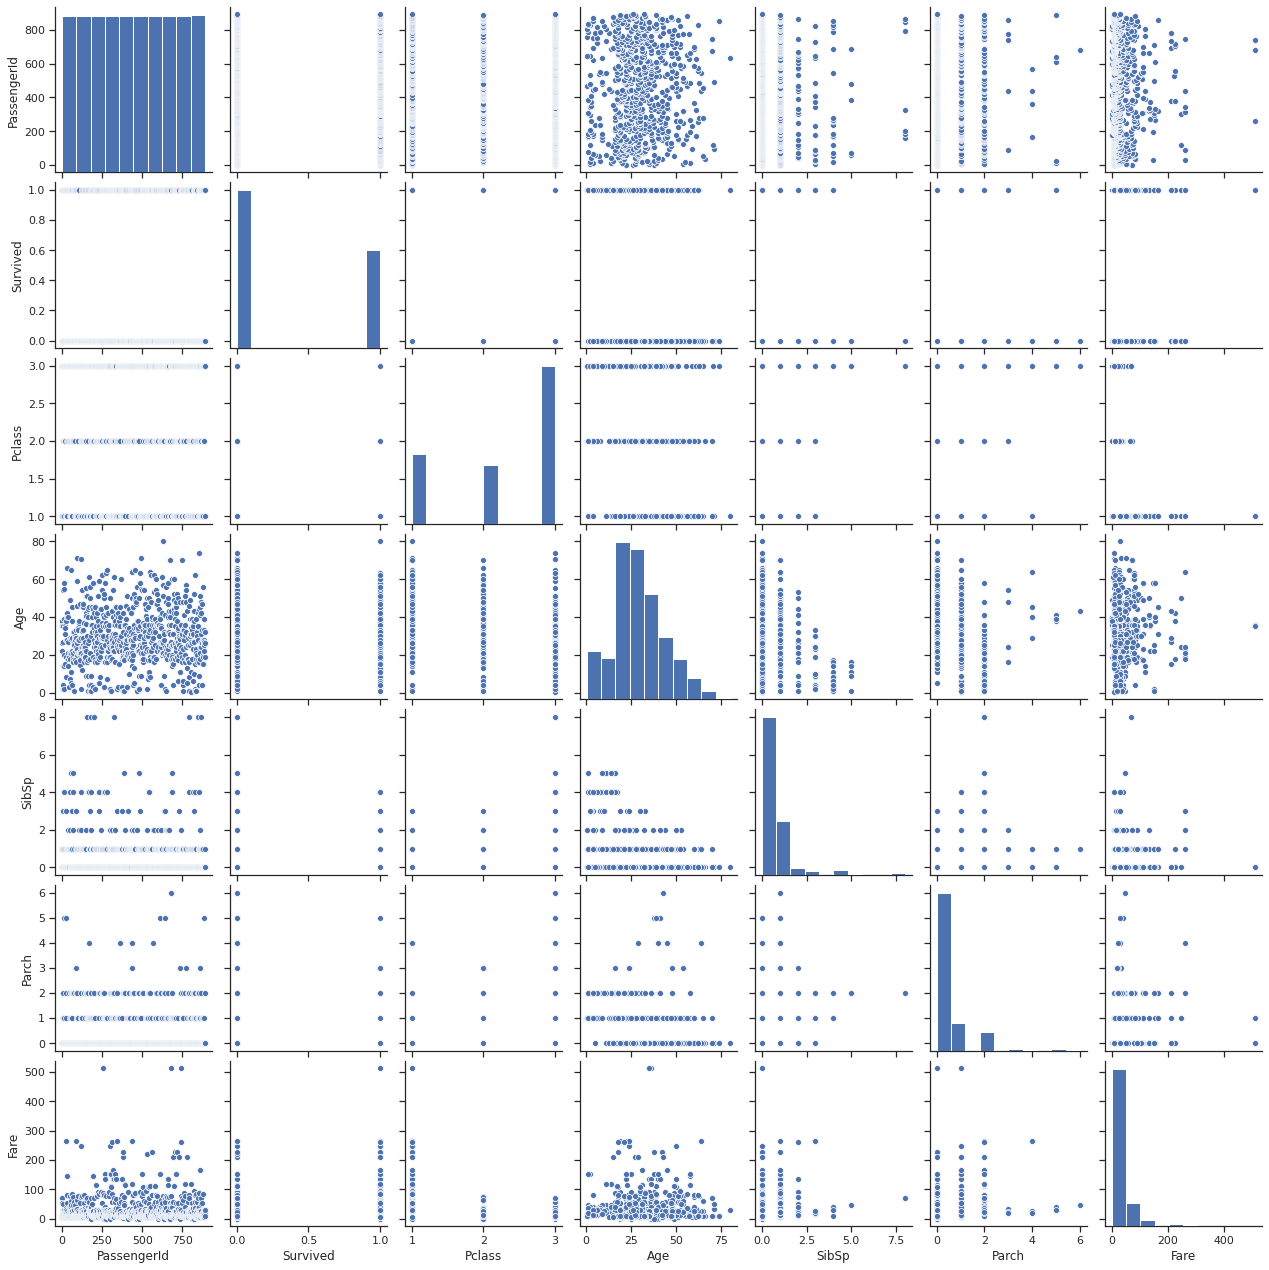

In [ ]:
sns.pairplot(df)

**BOX PLOT**

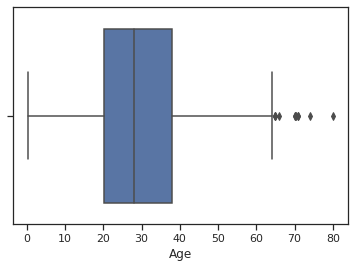

In [ ]:
sns.boxplot(df['Age'])

# Handling Missing Values

# **Handling the Missing Values**

Here in out data, I found that there are three columns where missing values are present i.e. **AGE** and  **Embarked**.


**bfill()** :  is used to backward fill the missing values in the dataset. It will backward fill the NaN values that are present in the pandas dataframe.

**ffill()** : is used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.


Filling the Missing Values in Age Column by *BFILL* method.


In [ ]:
df['Age']=df['Age'].fillna(method='bfill')

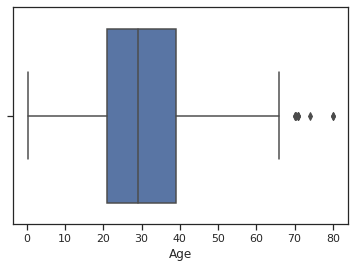

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
df[df['Age']>68]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
95,96,0,3,male,71.0,0,0,374910,8.0500,S
96,97,0,1,male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,male,70.5,0,0,370369,7.7500,Q
493,494,0,1,male,71.0,0,0,PC 17609,49.5042,C
629,630,0,3,male,80.0,0,0,334912,7.7333,Q
630,631,1,1,male,80.0,0,0,27042,30.0000,S
672,673,0,2,male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,male,74.0,0,0,347060,7.7750,S


Filling the Missing Values in Embarked Column by BFILL method.

In [ ]:
df['Embarked']=df['Embarked'].fillna(method='ffill')

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


**Now getting a view of the dataframe**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


Handling the Categorical Columns i.e. **Sex** and **Embarked**

In [ ]:
X=pd.get_dummies(df['Sex'], prefix='Sex')

In [ ]:
X.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Concatinating the dataframed obtained

In [ ]:
df=pd.concat([df,X],axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,1


In [ ]:
X=pd.get_dummies(df['Embarked'], prefix='Embarked')

In [ ]:
df=pd.concat([df,X],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,1,0,0,1


**Dropping the Original Categorical Columns**

In [ ]:
df=df.drop(['Sex','Embarked','Ticket'],axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


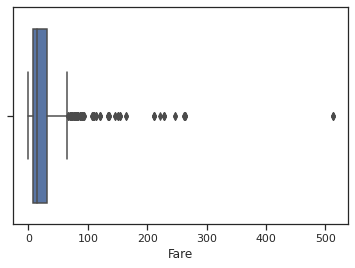

In [ ]:
import seaborn as sns
sns.boxplot(df['Fare'])

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df.shape

(891, 12)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



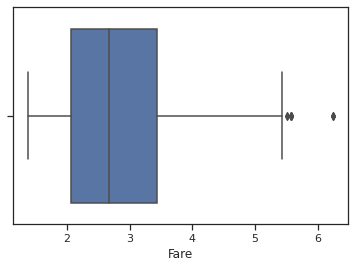

In [ ]:
sns.boxplot(np.log(df['Fare']))

KDE PLOT

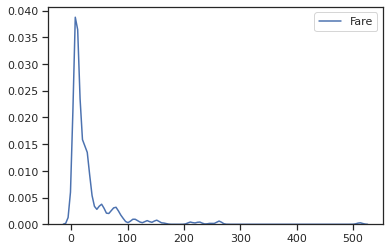

In [ ]:
sns.kdeplot((df['Fare']))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.021671,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.005476,-0.027482,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.055505,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.171485,0.008660,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.295367,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.247223,0.213504,0.081720
Age,0.021671,-0.055505,-0.295367,1.000000,-0.204810,-0.161386,0.085406,-0.061342,0.061342,0.018895,0.023072,-0.031117
SibSp,-0.057527,-0.035322,0.083081,-0.204810,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.060751,-0.028085,0.070941
Parch,-0.001652,0.081629,0.018443,-0.161386,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.012400,-0.082636,0.063036
Fare,0.012658,0.257307,-0.549500,0.085406,0.159651,0.216225,1.000000,0.182333,-0.182333,0.271478,-0.112712,-0.166603
Sex_female,-0.042939,0.543351,-0.131900,-0.061342,0.114631,0.245489,0.182333,1.000000,-1.000000,0.086546,0.079067,-0.125722
Sex_male,0.042939,-0.543351,0.131900,0.061342,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.086546,-0.079067,0.125722
Embarked_C,-0.005476,0.171485,-0.247223,0.018895,-0.060751,-0.012400,0.271478,0.086546,-0.086546,1.000000,-0.149857,-0.781213


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


# Feature Scaling using MinMaxScaler

In [ ]:
sc=['Age','Fare']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[sc]= scaler.fit_transform(df[sc])

In [ ]:
feature=df.drop(['PassengerId','Survived'],axis=1)
target=df['Survived']


In [ ]:
feature.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,0.434531,1,0,0.103644,1,0,0,0,1
4,3,0.434531,0,0,0.015713,0,1,0,0,1


# Now Working on TEST DATA

Applying the same operations on Test Data

In [ ]:
ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
ds=ds.drop(['Name','Cabin'],axis=1)

In [ ]:
ds['Embarked']=ds['Embarked'].fillna(method='ffill')
ds['Age']=ds['Age'].fillna(method='ffill')


In [ ]:
ds.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S


In [ ]:
X=pd.get_dummies(ds['Sex'], prefix='Sex')
ds=pd.concat([ds,X],axis=1)

In [ ]:
X=pd.get_dummies(ds['Embarked'], prefix='Embarked')
ds=pd.concat([ds,X],axis=1)

In [ ]:
ds.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,330911,7.8292,Q,0,1,0,1,0
1,893,3,female,47.0,1,0,363272,7.0000,S,1,0,0,0,1
2,894,2,male,62.0,0,0,240276,9.6875,Q,0,1,0,1,0
3,895,3,male,27.0,0,0,315154,8.6625,S,0,1,0,0,1
4,896,3,female,22.0,1,1,3101298,12.2875,S,1,0,0,0,1


In [ ]:
ds=ds.drop(['Sex','Embarked','Ticket'],axis=1)

In [ ]:
ds.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



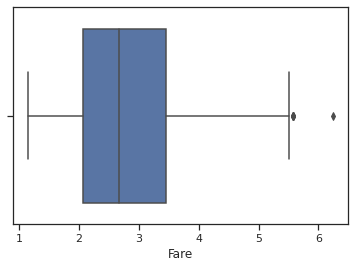

In [ ]:
sns.boxplot(np.log(ds['Fare']))

In [ ]:
ds.shape

(418, 11)

In [ ]:
ds.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()

ds[sc]= scaler.fit_transform(ds[sc])


In [ ]:
ds.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0.452723,0,0,0.015282,0,1,0,1,0
1,893,3,0.617566,1,0,0.013663,1,0,0,0,1
2,894,2,0.815377,0,0,0.018909,0,1,0,1,0
3,895,3,0.353818,0,0,0.016908,0,1,0,0,1
4,896,3,0.287881,1,1,0.023984,1,0,0,0,1


# Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X_Train, X_Test, Y_Train, Y_Test = train_test_split(feature, target, test_size = 0.20, random_state = 50) #train.csv

**Random Forest Classifier**

In [ ]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=100).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

0.18508763500000214
[[94  7]
 [27 51]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       101
           1       0.88      0.65      0.75        78

    accuracy                           0.81       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.81      0.80       179



**Feature Selection**

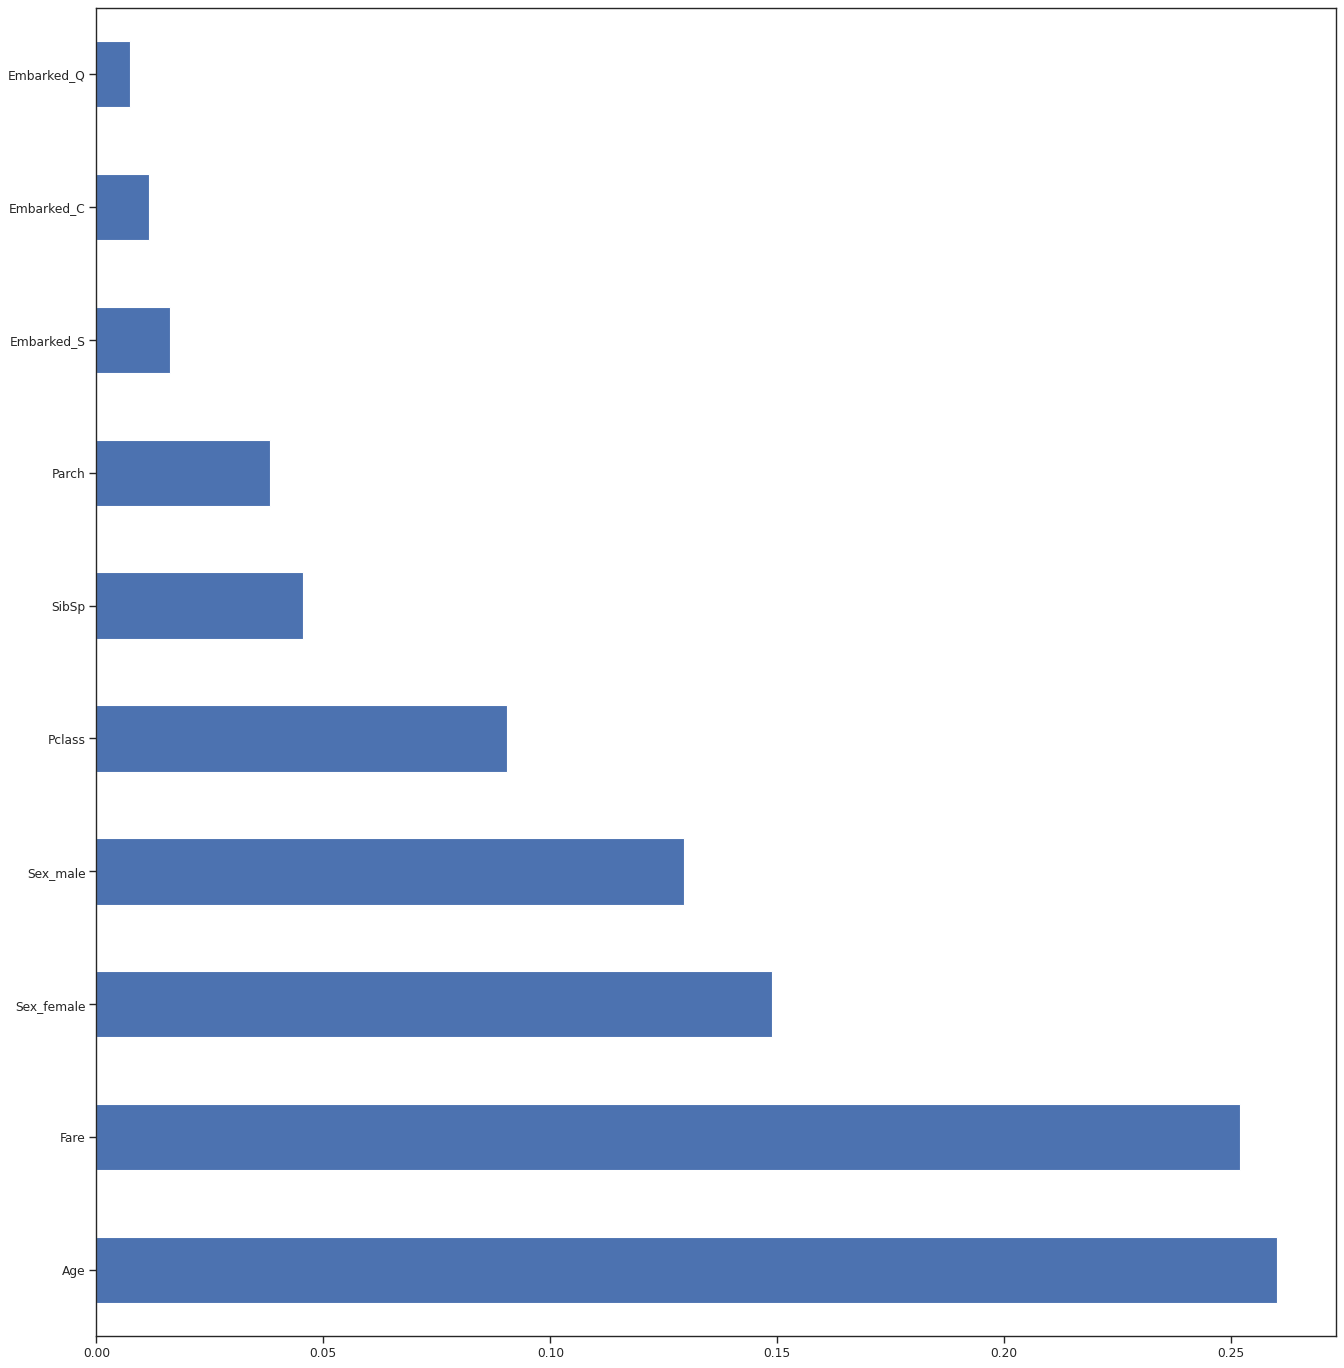

In [ ]:
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')
X=df.iloc[:,:-1]
feat_importances = pd.Series(trainedforest.feature_importances_, index= feature.columns)
feat_importances.nlargest(19).plot(kind='barh')

**Defining the ROC CURVE fuction**

In [ ]:
from sklearn import  metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [ ]:
Y_Train

567    0
648    0
790    0
618    1
77     0
      ..
132    0
289    1
109    1
480    0
688    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
print(len(Y_Test))
print(len(predictionforest))

179
179


**ROC CURVE**

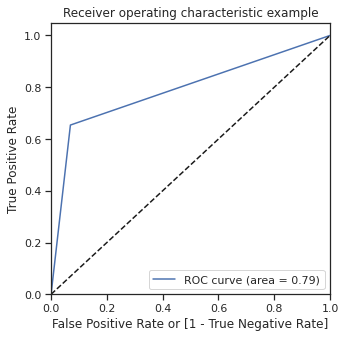

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( Y_Test , predictionforest)
draw_roc(Y_Test , predictionforest)

**Logistic Regression Model**

In [ ]:
cls=LogisticRegression()

In [ ]:
cls.fit(X_Train,Y_Train)
pred=cls.predict(X_Test)

***Confusion Matrix & Classification Report***

In [ ]:
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[89 12]
 [27 51]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.81      0.65      0.72        78

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



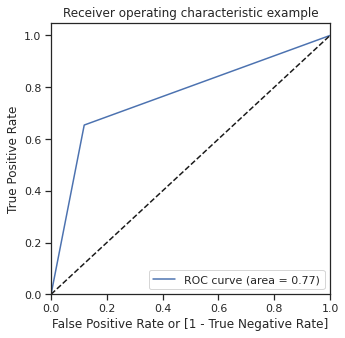

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( Y_Test , pred)
draw_roc(Y_Test , pred)

**Reduced Features**

In [ ]:
feature_reduced=feature[['Age','Sex_male','Sex_female','Fare','Pclass']]

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(feature_reduced, target, test_size = 0.20, random_state = 50) #train.csv

In [ ]:
cls=LogisticRegression()
cls.fit(X_Train,Y_Train)
pred=cls.predict(X_Test)

In [ ]:
print(confusion_matrix(Y_Test,pred))
print(classification_report(Y_Test,pred))

[[88 13]
 [27 51]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       101
           1       0.80      0.65      0.72        78

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



Now the Accuracy comes 78% with Precision up to 78.5% and Recaal 75% 

In [ ]:
Test=ds[['Age','Sex_male','Sex_female','Fare','Pclass']]

In [ ]:
Test.isna().sum()

Age           0
Sex_male      0
Sex_female    0
Fare          1
Pclass        0
dtype: int64

In [ ]:
Test.head()

,Age,Sex_male,Sex_female,Fare,Pclass
0,0.452723,1,0,0.015282,3
1,0.617566,0,1,0.013663,3
2,0.815377,1,0,0.018909,2
3,0.353818,1,0,0.016908,3
4,0.287881,0,1,0.023984,3


In [ ]:
Test.isna().sum()

Age           0
Sex_male      0
Sex_female    0
Fare          1
Pclass        0
dtype: int64

In [ ]:
Test["Fare"]=Test["Fare"].fillna(method='bfill')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
final=cls.predict(Test)

In [ ]:
final

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Designing the OUTPUT SUBMISSION FILE**

In [ ]:
final_df=ds['PassengerId']

In [ ]:
final=pd.Series(final)

In [ ]:
final_df=pd.concat([final_df,final],axis=1)

In [ ]:
final_df.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
final_df.rename(columns={0:'Survived'},inplace = True)

In [ ]:
final_df.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [ ]:
final_df=final_df.dropna(axis=0)

*Final Output Dataframe*

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Saving the Submission.csv**

In [ ]:
final_df.to_csv('submission.csv',index=False)

In [ ]:
X=feature
Y=target

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,0.434531,1,0,0.103644,1,0,0,0,1
4,3,0.434531,0,0,0.015713,0,1,0,0,1


# PCA 

In [ ]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=100).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [ ]:
def complete_test_2D(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['Survived']], axis = 1)
    Small_df['Survived'] = LabelEncoder().fit_transform(Small_df['Survived'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Survived', 'Not Survived']):

        trace = dict(
            type='scatter',
            x= Small_df.loc[Small_df['Survived'] == clas, 'C1'],
            y= Small_df.loc[Small_df['Survived'] == clas, 'C2'],
            mode= 'markers',
            name= name,
            marker=dict(
                color=col,
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
        data.append(trace)

    layout = dict(
            title= plot_name + ' 2D Dimensionality Reduction',
            xaxis=dict(title='C1', showline=False),
            yaxis=dict(title='C2', showline=False)
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [ ]:
def complete_test_3D(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2', 'C3'])
    Small_df = pd.concat([Small_df, df['Survived']], axis = 1)
    Small_df['Survived'] = LabelEncoder().fit_transform(Small_df['Survived'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Survived', 'Not Survived']):

        trace = dict(
            type='scatter3d',
            x= Small_df.loc[Small_df['Survived'] == clas, 'C1'],
            y= Small_df.loc[Small_df['Survived'] == clas, 'C2'],
            z= Small_df.loc[Small_df['Survived'] == clas, 'C3'],
            mode= 'markers',
            name= name
        )
        data.append(trace)

    layout = {
        "scene": {
          "xaxis": {
            "title": "C1", 
            "showline": False
          }, 
          "yaxis": {
            "title": "C2", 
            "showline": False
          }, 
          "zaxis": {
            "title": "C3", 
            "showline": False
          }
        }, 
        "title": plot_name + ' 3D Dimensionality Reduction'
    }
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['Survived']], axis = 1)
PCA_df['Survived'] = LabelEncoder().fit_transform(PCA_df['Survived'])
PCA_df.head()

,PC1,PC2,Survived
0,0.267741,-0.929582,0
1,0.199597,1.615131,1
2,-0.430092,-0.439731,1
3,0.262226,1.348371,1
4,-0.618099,-0.889257,0


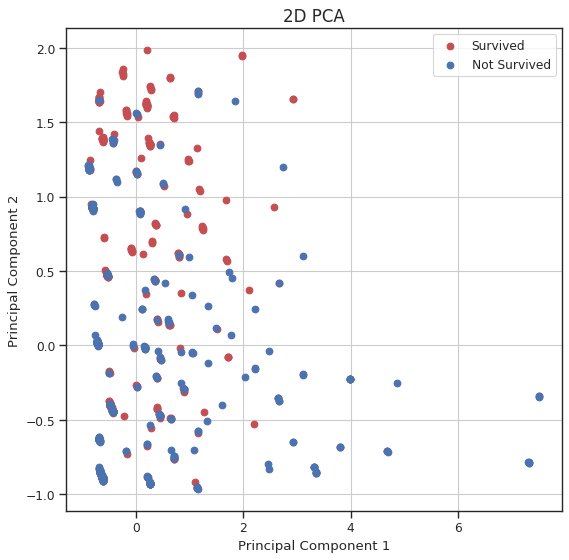

In [ ]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['Survived'] == clas, 'PC1'], PCA_df.loc[PCA_df['Survived'] == clas, 'PC2'], c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Survived', 'Not Survived'])
plt.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.40782816, 0.21514552])

In [ ]:
complete_test_2D(X_pca,Y.values, 'PCA')

0.17461659900000015
[[84 15]
 [23 57]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.79      0.71      0.75        80

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# LASSO

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(feature, target, test_size = 0.20, random_state = 50) #train.csv

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=25)
rfe = RFE(model, 4)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))

0.36225849300000235
Overall Accuracy using RFE:  0.7597765363128491


In [ ]:
model = RandomForestClassifier(n_estimators=100)
rfe = RFE(model, 6)
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
model.fit(RFE_X_Train,Y_Train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(feature.columns))
colcheck[colcheck == True].index

Number of Features:  6
Selected Features: 


Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')

In [ ]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(feature.columns))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

LassoCV Best Alpha Scored:  0.001887116467148036
LassoCV Model Accuracy:  0.3750393158515381
Variables Eliminated:  3
Variables Kept:  7


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

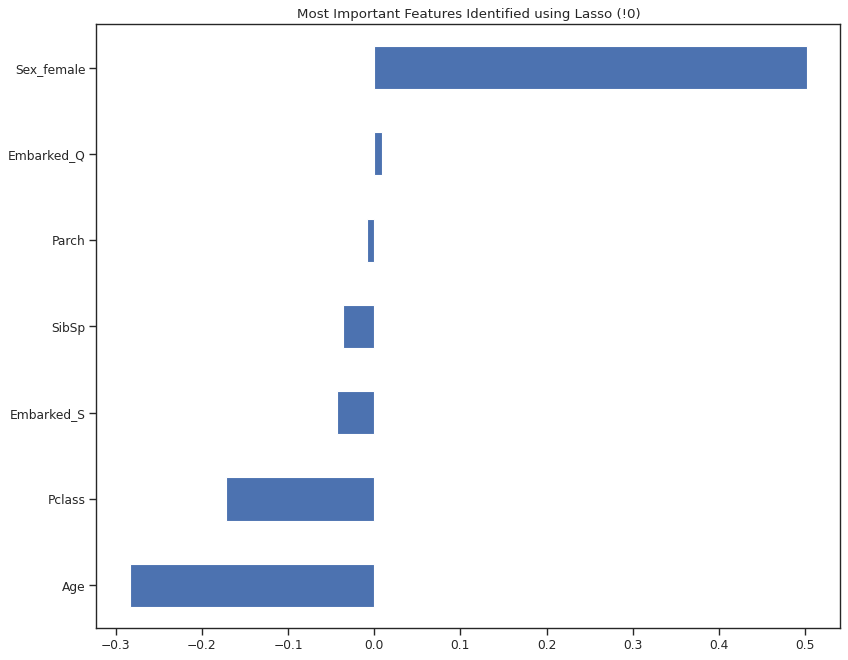

In [ ]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

**KNN**

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier.fit(X_Train, Y_Train)

# Predicting the Test set results
y_pred = classifier.predict(X_Test)



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)


In [ ]:
print(confusion_matrix(Y_Test,y_pred))
print(classification_report(Y_Test,y_pred))

[[96  5]
 [38 40]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       101
           1       0.89      0.51      0.65        78

    accuracy                           0.76       179
   macro avg       0.80      0.73      0.73       179
weighted avg       0.79      0.76      0.74       179



**SVM**

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the Test set results
y_pred = classifier.predict(X_Test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)

In [ ]:
print(confusion_matrix(Y_Test,y_pred))
print(classification_report(Y_Test,y_pred))

[[87 14]
 [25 53]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       101
           1       0.79      0.68      0.73        78

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
feature.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,0.434531,1,0,0.103644,1,0,0,0,1
4,3,0.434531,0,0,0.015713,0,1,0,0,1


In [ ]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**GLM**

In [ ]:
import statsmodels.api as sm # Logistic regression model
logm1 = sm.GLM(Y_Train,(sm.add_constant(X_Train)), family = sm.families.Binomial())



In [ ]:
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -310.53
Date:                Fri, 21 Aug 2020   Deviance:                       621.05
Time:                        05:35:36   Pearson chi2:                     724.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8606      0.306      6.078      0.0

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5) # running RFE with 13 variables as output
rfe = rfe.fit(X_Train, Y_Train)


In [ ]:
rfe.support_


array([ True,  True, False, False, False,  True,  True, False, False,
        True])

In [ ]:
 list(zip(X_Train.columns, rfe.support_, rfe.ranking_))


[('Pclass', True, 1),
 ('Age', True, 1),
 ('SibSp', False, 3),
 ('Parch', False, 5),
 ('Fare', False, 2),
 ('Sex_female', True, 1),
 ('Sex_male', True, 1),
 ('Embarked_C', False, 6),
 ('Embarked_Q', False, 4),
 ('Embarked_S', True, 1)]

In [ ]:
col = X_Train.columns[rfe.support_]


In [ ]:
X_Train.columns[~rfe.support_]

Index(['SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_Train[col])
logm2 = sm.GLM(Y_Train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      707
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -316.64
Date:                Fri, 21 Aug 2020   Deviance:                       633.29
Time:                        05:35:46   Pearson chi2:                     741.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2841      0.314      7.265      0.0

In [ ]:
X_train_sm=X_train_sm.drop("Sex_male",axis=1)

In [ ]:
logm2 = sm.GLM(Y_Train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      707
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -316.64
Date:                Fri, 21 Aug 2020   Deviance:                       633.29
Time:                        05:35:49   Pearson chi2:                     741.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1265      0.458      4.641      0.0

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

567    0.509274
648    0.083052
790    0.146379
618    0.865793
77     0.140915
11     0.828526
553    0.127415
162    0.077134
18     0.495882
741    0.392963
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.50927449, 0.08305197, 0.14637939, 0.86579298, 0.1409155 ,
       0.82852578, 0.12741511, 0.07713352, 0.49588193, 0.39296342])

**Probabilities**

In [ ]:
y_train_pred_final = pd.DataFrame({'Survived':Y_Train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final.head()


,Survived,Survived_Prob
0,0,0.509274
1,0,0.083052
2,0,0.146379
3,1,0.865793
4,0,0.140915


**Criteria of 0.65 was the optimal in our case**

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x >0.65 else 0)

In [ ]:
y_train_pred_final.head()

,Survived,Survived_Prob,Predicted
0,0,0.509274,0
1,0,0.083052,0
2,0,0.146379,0
3,1,0.865793,1
4,0,0.140915,0


In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Predicted )
print(confusion)

[[430  18]
 [115 149]]


**Thus accurcay came out to be 81.3%**

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Predicted))

0.8132022471910112


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5643939393939394

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9598214285714286

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04017857142857143


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.8922155688622755


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7889908256880734


**FINAL ROC Curve**

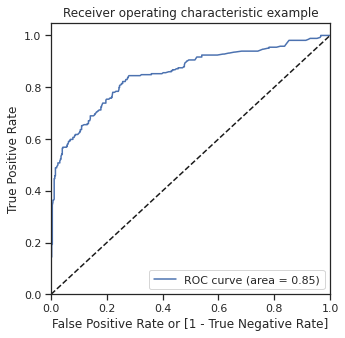

In [ ]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)